<a href="https://colab.research.google.com/github/RogerzribeiroAlura8/Challeng1DataScience/blob/main/Challeng1RZR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.concat([loja, loja2, loja3, loja4])

In [ ]:
print(df.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [ ]:
# 1. Preparar os Dados
df['quantidade_vendida'] = 1
df['faturamento'] = df['Preço'] + df['Frete']



In [ ]:
faturamento_por_loja = df.groupby('Local da compra')['faturamento'].sum().reset_index()
print(faturamento_por_loja)

   Local da compra   faturamento
0               AC  2.952524e+03
1               AL  2.718725e+04
2               AM  8.259759e+03
3               AP  3.976256e+03
4               BA  1.854335e+05
5               CE  7.457535e+04
6               DF  1.438078e+05
7               ES  1.125119e+05
8               GO  1.395848e+05
9               MA  4.312779e+04
10              MG  7.276883e+05
11              MS  5.409288e+04
12              MT  5.119817e+04
13              PA  4.965774e+04
14              PB  3.106626e+04
15              PE  1.272298e+05
16              PI  2.934201e+04
17              PR  3.241085e+05
18              RJ  8.125429e+05
19              RN  3.777058e+04
20              RO  1.730412e+04
21              RR  4.425136e+03
22              RS  3.871468e+05
23              SC  2.047259e+05
24              SE  1.717727e+04
25              SP  2.548779e+06
26              TO  1.874888e+04


# 2. Vendas por Categoria


In [ ]:
vendas_por_categoria = df.groupby('Categoria do Produto')['quantidade_vendida'].sum().reset_index()
vendas_por_categoria = vendas_por_categoria.sort_values(by='quantidade_vendida', ascending=False)
print(vendas_por_categoria)

    Categoria do Produto  quantidade_vendida
6                 moveis                1886
2            eletronicos                1772
0             brinquedos                1290
1       eletrodomesticos                1149
3        esporte e lazer                1113
4  instrumentos musicais                 753
5                 livros                 742
7  utilidades domesticas                 730


In [ ]:
vendas_por_categoria_por_loja = df.groupby(['Local da compra', 'Categoria do Produto'])['quantidade_vendida'].sum().reset_index()
vendas_por_categoria_por_loja = vendas_por_categoria_por_loja.sort_values(by=['Local da compra', 'quantidade_vendida'], ascending=[True, False])
print(vendas_por_categoria_por_loja)

    Local da compra   Categoria do Produto  quantidade_vendida
0                AC       eletrodomesticos                   1
1                AC            eletronicos                   1
2                AC        esporte e lazer                   1
5                AL            eletronicos                   9
6                AL        esporte e lazer                   8
..              ...                    ...                 ...
193              TO            eletronicos                   4
191              TO             brinquedos                   3
195              TO  instrumentos musicais                   3
196              TO                 livros                   1
198              TO  utilidades domesticas                   1

[199 rows x 3 columns]


# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacoes_por_loja = df.groupby('Local da compra')['Avaliação da compra'].mean().reset_index()
print(media_avaliacoes_por_loja)

   Local da compra  Avaliação da compra
0               AC             3.666667
1               AL             3.634146
2               AM             4.071429
3               AP             3.777778
4               BA             3.803226
5               CE             3.596026
6               DF             4.020661
7               ES             4.017544
8               GO             3.940860
9               MA             3.677419
10              MG             4.090744
11              MS             4.097561
12              MT             4.112500
13              PA             3.691358
14              PB             4.086957
15              PE             3.977901
16              PI             3.800000
17              PR             4.078224
18              RJ             3.777228
19              RN             4.208333
20              RO             3.894737
21              RR             3.000000
22              RS             4.018727
23              SC             4.011561


# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos_mais_vendidos = df.groupby('Produto')['quantidade_vendida'].sum().reset_index()
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='quantidade_vendida', ascending=False).head(10)  # Top 10 mais vendidos
print("Produtos mais vendidos:")
print(produtos_mais_vendidos)

Produtos mais vendidos:
                     Produto  quantidade_vendida
17                    Cômoda                 210
10  Carrinho controle remoto                 206
37               Micro-ondas                 206
1                    Bateria                 203
9                  Cama king                 201
30           Jogo de panelas                 200
39       Modelagem preditiva                 200
43        Secadora de roupas                 200
3           Blocos de montar                 199
8                   Cama box                 199


In [ ]:
produtos_menos_vendidos = df.groupby('Produto')['quantidade_vendida'].sum().reset_index()
produtos_menos_vendidos = produtos_menos_vendidos.sort_values(by='quantidade_vendida', ascending=True).head(10)  # Top 10 menos vendidos
print("\nProdutos menos vendidos:")
print(produtos_menos_vendidos)


Produtos menos vendidos:
                        Produto  quantidade_vendida
11                 Celular ABXY                 157
26                      Headset                 158
38                      Mochila                 163
25                     Guitarra                 165
13  Ciência de dados com python                 166
0            Assistente virtual                 167
42                     Poltrona                 168
29                Jogo de copos                 169
45                   Smartwatch                 172
41            Panela de pressão                 172


# 5. Frete Médio por Loja


In [ ]:
frete_medio_por_loja = df.groupby('Local da compra')['Frete'].mean().reset_index()
print(frete_medio_por_loja)

   Local da compra       Frete
0               AC   49.361324
1               AL   33.258053
2               AM   29.368488
3               AP   21.646223
4               BA   30.257176
5               CE   25.002442
6               DF   30.185782
7               ES   33.199995
8               GO   38.129811
9               MA   35.129564
10              MG   33.460381
11              MS   33.694141
12              MT   32.691573
13              PA   30.633504
14              PB   33.910674
15              PE   35.720970
16              PI   36.948903
17              PR   34.569335
18              RJ   33.935633
19              RN   40.090987
20              RO   46.347240
21              RR  113.673032
22              RS   36.582407
23              SC   29.838897
24              SE   30.487058
25              SP   32.709219
26              TO   33.462289


In [ ]:
import matplotlib.pyplot as plt

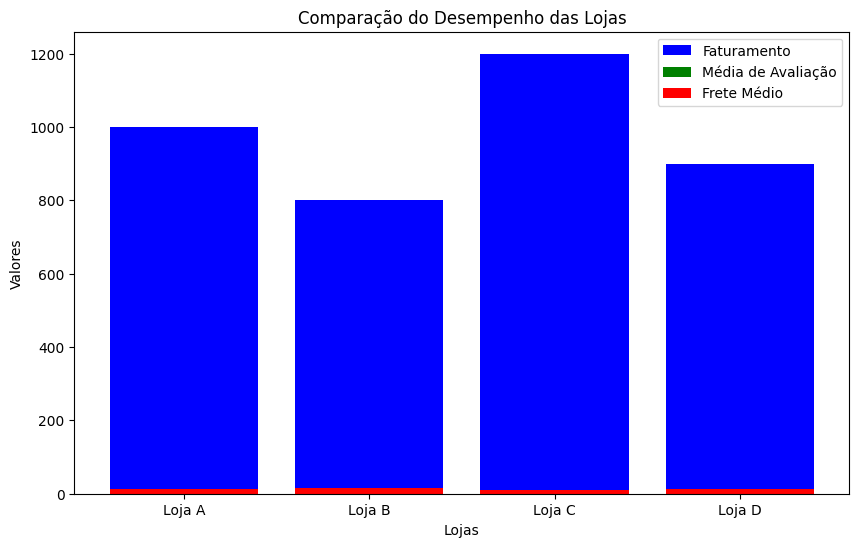

In [ ]:
import matplotlib.pyplot as plt

# Dados para o gráfico
lojas = ['Loja A', 'Loja B', 'Loja C', 'Loja D']
faturamento = [1000, 800, 1200, 900]
media_avaliacao = [4.2, 3.8, 4.5, 3.5]
frete_medio = [12.50, 15.25, 10.75, 13.50]

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(lojas, faturamento, color='blue', label='Faturamento')
ax.bar(lojas, media_avaliacao, color='green', label='Média de Avaliação')
ax.bar(lojas, frete_medio, color='red', label='Frete Médio')

ax.set_title('Comparação do Desempenho das Lojas')
ax.set_xlabel('Lojas')
ax.set_ylabel('Valores')
ax.legend()

plt.show()

O faturamento da loja 2 é menor do que as outras, portanto  é a minha sugestão de venda para o senhor João.
